# 4.4.5 モデルの評価

In [1]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# Irisデータセットを読み込む
iris = load_iris()
X, y = iris.data[:100, :], iris.target[:100]
# 学習データセット、テストデータセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# SVMのインスタンス化
svc = SVC()
# SVMで学習
svc.fit(X_train, y_train)
# テストデータセットの予測
y_pred = svc.predict(X_test)

In [2]:
from sklearn.metrics import classification_report
# 適合率、再現率、F値を出力
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
# サポートベクタマシンをインスタンス化
svc = SVC()
# 10分割の交差検証を実行
cross_val_score(svc, X, y, cv=10, scoring='precision')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

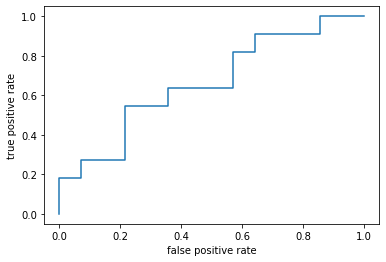

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# 偽陽性率と真陽性率を算出
fpr = np.array([0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 4, 5, 5, 6, 7, 8, 8, 8, 9, 10, 11, 12, 12, 13, 14])/14
tpr = np.array([0, 1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7, 7, 7, 8, 9, 9, 10, 10, 10, 11, 11, 11])/11
# ROC曲線をプロット
fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
plt.show()

In [5]:
from sklearn.metrics import roc_curve
labels = np.array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])
probs = np.array([0.98, 0.95, 0.9, 0.87, 0.85, 
                  0.8, 0.75, 0.71, 0.63, 0.55, 
                  0.51, 0.47, 0.43, 0.38, 0.35, 
                  0.31, 0.28, 0.24, 0.22, 0.19, 
                  0.15, 0.12, 0.08, 0.004, 0.01])
# 偽陽性率、真陽性率、しきい値を算出
fpr, tpr, threshold = roc_curve(labels, probs)
print('偽陽性率: ', fpr)
print('真陽性率: ', tpr)

偽陽性率:  [0.         0.         0.         0.07142857 0.07142857 0.21428571
 0.21428571 0.35714286 0.35714286 0.57142857 0.57142857 0.71428571
 0.71428571 0.85714286 0.85714286 1.        ]
真陽性率:  [0.         0.09090909 0.18181818 0.18181818 0.27272727 0.27272727
 0.54545455 0.54545455 0.63636364 0.63636364 0.81818182 0.81818182
 0.90909091 0.90909091 1.         1.        ]


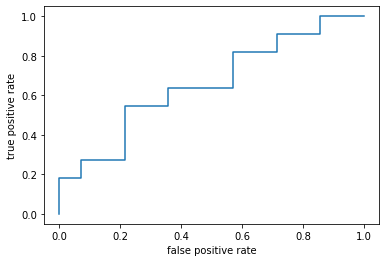

In [6]:
# ROC曲線をプロット
fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
plt.show()

In [7]:
from sklearn.metrics import roc_auc_score
# AUCを算出
roc_auc_score(labels, probs)

0.6558441558441558